In [1]:
# Import libraries for reading data, exploring and plotting
import pandas as pd
import numpy as np
from numpy import asarray, zeros
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import re
import json
import pickle

# Import Machine Learning libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import TensorFlow for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Bidirectional, Embedding, SpatialDropout1D, Flatten, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import tokenizer_from_json, Tokenizer
from tensorflow.keras.utils import to_categorical

# Import NLTK Libraries for natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')


In [70]:
# Mounting Google Drive onto the Colab runtime at the specified directory '/content/drive'

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# # Downloading 'punkt', 'wordnet', and 'stopwords' from NLTK (Natural Language Toolkit)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Read the CSV file into a pandas DataFrame

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [5]:
data = pd.read_csv('IMDB Dataset.csv')

In [6]:
# Create a copy of the DataFrame 'data' and assign it to a new variable 'df'

df = data.copy()

In [7]:
# Displaying the first few rows of the DataFrame `df`

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### **Exploratory Data Analysis and Preprocessing**

---



In [8]:
# Counting the number of missing values in each column of the DataFrame `df`

df.isnull().sum().sort_values(ascending=False)

review       0
sentiment    0
dtype: int64

In [8]:
# Display the concise summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#### **Target Distribution**

In [9]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### **Univariate Analysis**

---



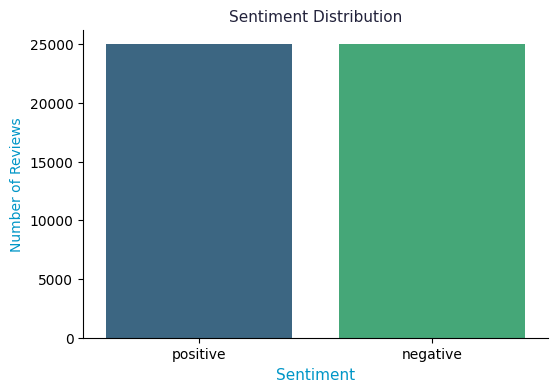

In [10]:
plt.figure(figsize=(6, 4))

sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution', fontdict={'color': '#22223b', 'fontsize': 11})
plt.xlabel('Sentiment', fontdict={'color': '#0096c7', 'fontsize': 11})
plt.ylabel('Number of Reviews', fontdict={'color': '#0096c7', 'fontsize': 10})
plt.xticks(fontsize=10)
sns.despine()
plt.show()

#### **Function to print a sample Review**

In [9]:
def sample_complain(index, data):
  review = data.iloc[index]['review']
  sentiment = data.iloc[index]['sentiment']

  if len(review) > 0:
    print(f"{review}\n")
    print(f"Sentiment: {sentiment}")
  else:
    print(f"Index: {index} not found")


In [10]:
sample_complain(1, df)

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.



### **Text PreProcessing**

---



To enable machines to process text effectively, we often convert textual data into numerical form. However, before this conversion, it's essential to clean the data. Data cleaning involves removing unnecessary punctuations and numbers, standardizing the text to either lower or upper case, and eliminating irrelevant white spaces

Creating a custom function to perform data cleaning

Clean the text data by performing the following operations:
- Convert text to lowercase.
- Remove HTML line break tags '(br)'.
- Replace certain punctuation marks with spaces.
- Remove other punctuation marks and special characters.
- Replace multiple consecutive spaces with a single space.
- Strip leading and trailing whitespaces.

In [11]:
import re
import nltk
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))

In [12]:
# Regular expression pattern to match HTML tags

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

class CustomPreprocess():

  def clean_text(text):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
      in lowercase'''

  def __init__(self):
    pass

  def preprocess_text(self, sentiment):
    sentiment = sentiment.lower()

    # Remove html tags
    sentence = remove_tags(sentiment)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [13]:
# Create an instance of the CustomPreprocess class
cus_fun = CustomPreprocess()

sentiment = "The first horror movie I ever saw was “Jaws”–an all-time classic filmed in 1975 by Steven Spielberg. My parents did not let me watch “Alien and it was great!,"

# Preprocess the input text using the preprocess_text method of the CustomPreprocess class
cus_fun.preprocess_text(sentiment)

'first horror movie ever saw jaws time classic filmed steven spielberg parents let watch alien great '

In [14]:
# Calling preprocessing_text funciton on movie_reviews

X = []
sentences = list(df['review'])

for sentence in sentences:
  X.append(cus_fun.preprocess_text(sentence))

In [16]:
# Sampled Cleaned Review

X[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends '

In [17]:
# Assigning the 'X' data to the 'review' column of the DataFrame 'df'

df['review'] = X

### **Word Cloud**

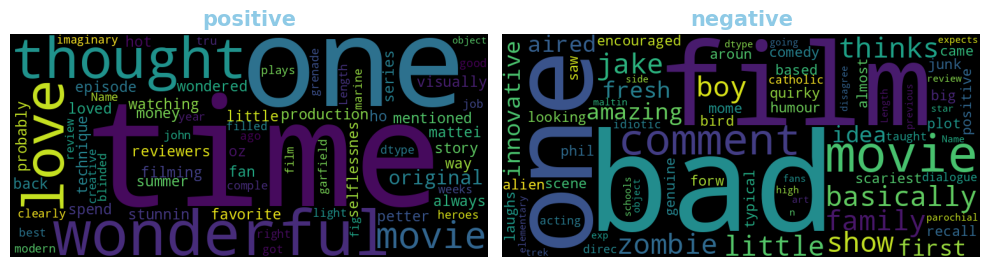

In [19]:
# Creating a figure for the word cloud plot
plt.figure(figsize=(10, 8))

# Looping through each unique Consumer Complaint Type
for index, sent in enumerate(df['sentiment'].unique()):
  plt.subplot(1, 2, index+1)

  # Generating WordCloud
  data = str(df[df['sentiment'] == sent]['review'])

  word_cloud = WordCloud(width=750, height=350, background_color='black').generate(data)
  plt.title(f"{sent}", fontdict={'fontweight': 'bold', 'fontsize': 15, 'color': '#8ecae6'})

  # Display word cloud
  plt.imshow(word_cloud)
  plt.axis('off')

plt.tight_layout()
plt.show()

#### **Converting Sentiment Labels to Numeric**

In [18]:
Y = df['sentiment']
Y = np.array(list(map(lambda x: 1 if x=='positive' else 0, Y)))

print(f"The Shape of Y: {Y.shape}")

The Shape of Y: (50000,)


### **Splitting the Data into Training and Testing**

---



In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=4)

print(f'The Shape of Xtrain: {np.array(xtrain).shape}')
print(f'The Shape of Ytrain: {ytrain.shape}\n')
print(f'The Shape of Xtest: {np.array(xtest).shape}')
print(f'The Shape of Ytest: {ytest.shape}')

The Shape of Xtrain: (40000,)
The Shape of Ytrain: (40000,)

The Shape of Xtest: (10000,)
The Shape of Ytest: (10000,)


#### **Prepraring Embedding Layer**

---



**Tokenize and Pad/Truncate Reviews**

* A Neural Network only accepts numeric data, so we need to encode the reviews. I use tensorflow.keras.preprocessing.text.Tokenizer to encode the reviews into integers, where each unique word is automatically indexed (using fit_on_texts method) based on x_train.
x_train and x_test is converted into integers using texts_to_sequences method.

* Each reviews has a different length, so we need to add padding (by adding 0) or truncating the words to the same length (in this case, it is the mean of all reviews length) using tensorflow.keras.preprocessing.sequence.pad_sequences.

* post, pad or truncate the words in the back of a sentence
* pre, pad or truncate the words in front of a sentence

In [20]:
# Embedding layer expects the words to be in number form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit on text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()

word_tokenizer.fit_on_texts(xtrain)

xtrain = word_tokenizer.texts_to_sequences(xtrain)
xtest = word_tokenizer.texts_to_sequences(xtest)

In [21]:
# Calculate the vocabulary length by adding 1 to the length of the word index in the word tokenizer
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

92080

In [22]:
# Padding all reviews to fixed length of 100 words

max_length = 100

xtrain_pad = pad_sequences(xtrain, padding='post', maxlen=max_length)
xtest_pad = pad_sequences(xtest, padding='post', maxlen=max_length)

In [23]:
print(f"Xtrain After Post-Padding: {xtrain_pad}\n")
print(f"Xtest After Post-Padding: {xtest_pad}")

Xtrain After Post-Padding: [[ 335  269 1070 ...    0    0    0]
 [ 122  428   12 ... 4294 6985  330]
 [  39  589 3009 ...   71   74 1109]
 ...
 [6207 1718   43 ... 7764   30 3337]
 [ 193    2 1284 ...    0    0    0]
 [ 889   97  188 ...  126  445   61]]

Xtest After Post-Padding: [[  365   250   192 ...  7820    28     1]
 [    5  1528   867 ...     0     0     0]
 [   30 33384   772 ...     0     0     0]
 ...
 [    5  1905   192 ...   161   193   230]
 [   21  2805  1261 ...    29   552     1]
 [  218  6917  2664 ...   120  6917     1]]


**Load GloVe Word Embedding and Create an Embedding Dictionary**

In [26]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2024-04-26 09:50:07--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.73MB/s    in 2m 42s  

2024-04-26 09:52:50 (5.07 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [27]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [24]:
# Define an empty dictionary to store word embeddings
embedding_dictionary = dict()

# function to load GloVe word embeddings into the dictionary

def glove_embd(dic, filename):
  with open(filename, encoding='utf8') as glove_file:

    for line in glove_file:
      records = line.split()
      word = records[0]
      vector_dimensions = asarray(records[1:], dtype='float32')
      dic[word] = vector_dimensions


# Call the function to load GloVe embeddings into the dictionary
# glove_embd(embedding_dictionary, '/content/glove.6B.100d.txt')

glove_embd(embedding_dictionary, 'website/glove.6B.100d.txt')

In [25]:
# Calculate the length of the word embedding vector for the word "bad" 

len(embedding_dictionary['bad'])

100

In [27]:
# Creating Embedding Matrix having 100 columns

embedding_matrix = zeros((vocab_length, 100))

for word, index in word_tokenizer.word_index.items():
  embedding_vector = embedding_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [28]:
embedding_matrix.shape

(92080, 100)

### **Model Building and Model Architecture**

---



### **Recurrent Neural Network - [RNN]**


In [32]:
# Define and compile the model
Model_rnn = Sequential()

Model_rnn.add(Embedding(input_dim=vocab_length, weights=[embedding_matrix], output_dim=100, input_length=max_length, trainable=False))
Model_rnn.add(SpatialDropout1D(0.2))
Model_rnn.add(SimpleRNN(units=62, dropout=0.2, recurrent_dropout=0.2))
Model_rnn.add(Dense(units=1, activation='sigmoid'))

Model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Compile the model
Model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Print the model summary

Model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9208000   
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 100)          0         
 Dropout1D)                                                      
                                                                 
 simple_rnn (SimpleRNN)      (None, 62)                10106     
                                                                 
 dense (Dense)               (None, 1)                 63        
                                                                 
Total params: 9218169 (35.16 MB)
Trainable params: 10169 (39.72 KB)
Non-trainable params: 9208000 (35.13 MB)
_________________________________________________________________


In [36]:
# Train the 'Model_rnn' model on the training data 'xtrain_pad' and labels 'ytrain'
# using a batch size of 128, for 6 epochs, and with a validation split of 0.2

history = Model_rnn.fit(xtrain_pad, ytrain, batch_size=128, epochs=6, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 29s 104ms/step - loss: 0.7033 - accuracy: 0.5188 - val_loss: 0.6830 - val_accuracy: 0.5346
Epoch 2/6
250/250 [==============================] - 29s 118ms/step - loss: 0.6857 - accuracy: 0.5318 - val_loss: 0.6803 - val_accuracy: 0.5516
Epoch 3/6
250/250 [==============================] - 28s 110ms/step - loss: 0.6741 - accuracy: 0.5741 - val_loss: 0.6195 - val_accuracy: 0.6801
Epoch 4/6
250/250 [==============================] - 20s 80ms/step - loss: 0.6831 - accuracy: 0.5458 - val_loss: 0.6750 - val_accuracy: 0.5554
Epoch 5/6
250/250 [==============================] - 24s 98ms/step - loss: 0.6748 - accuracy: 0.5587 - val_loss: 0.6663 - val_accuracy: 0.6460
Epoch 6/6
250/250 [==============================] - 25s 100ms/step - loss: 0.6739 - accuracy: 0.5589 - val_loss: 0.6371 - val_accuracy: 0.6100


In [37]:
# Predictions on the Test Set

score = Model_rnn.evaluate(xtest_pad, ytest)

313/313 [==============================] - 5s 14ms/step - loss: 0.6347 - accuracy: 0.6089


#### **Simple Neural Network**

In [38]:
#  Neural Network architecture
from keras.layers import Flatten

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_length , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [39]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9208000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 9218001 (35.16 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9208000 (35.13 MB)
_________________________________________________________________
None


In [40]:
# Model training

snn_model_history = snn_model.fit(xtrain_pad, ytrain, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 6s 20ms/step - loss: 0.5626 - acc: 0.7110 - val_loss: 0.5089 - val_acc: 0.7524
Epoch 2/6
250/250 [==============================] - 4s 16ms/step - loss: 0.4510 - acc: 0.7968 - val_loss: 0.5009 - val_acc: 0.7664
Epoch 3/6
250/250 [==============================] - 3s 10ms/step - loss: 0.4131 - acc: 0.8182 - val_loss: 0.5082 - val_acc: 0.7606
Epoch 4/6
250/250 [==============================] - 2s 10ms/step - loss: 0.3898 - acc: 0.8290 - val_loss: 0.5176 - val_acc: 0.7600
Epoch 5/6
250/250 [==============================] - 2s 9ms/step - loss: 0.3753 - acc: 0.8376 - val_loss: 0.5344 - val_acc: 0.7502
Epoch 6/6
250/250 [==============================] - 1s 6ms/step - loss: 0.3627 - acc: 0.8442 - val_loss: 0.5449 - val_acc: 0.7549


In [41]:
# Predictions on the Test Set

score = snn_model.evaluate(xtest_pad, ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.5448 - acc: 0.7521


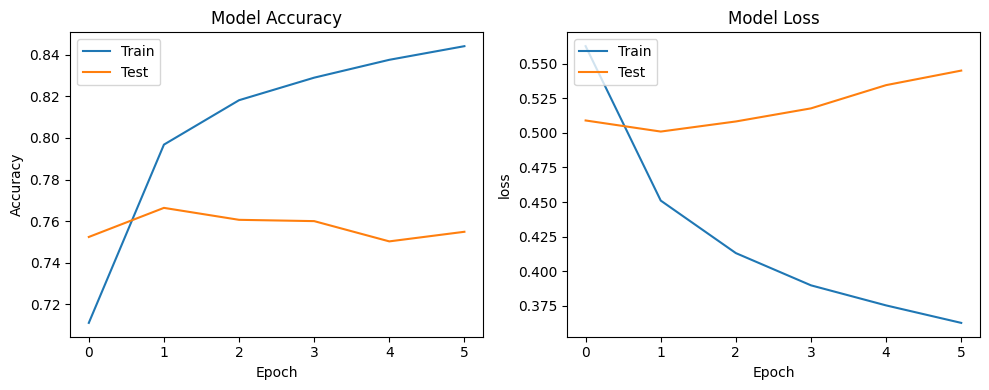

In [42]:
# Model Performance Chart

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()  # Adjust subplots to avoid overlapping
plt.show()

#### **Convolution Neural Network - [CNN]**

In [43]:
# Create a Sequential model 'CNN_Model'
CNN_Model = Sequential()

CNN_Model.add(Embedding(input_dim=vocab_length, output_dim=100, weights=[embedding_matrix], input_length=max_length, trainable=False))

# Add a 1D convolutional layer with 128 filters, kernel size 5, and ReLU activation
CNN_Model.add(Conv1D(128, 5, activation='relu'))                       
CNN_Model.add(GlobalMaxPooling1D())
CNN_Model.add(Dense(64, activation='relu'))
CNN_Model.add(Dropout(0.2))
CNN_Model.add(Dense(32, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation for binary classification
CNN_Model.add(Dense(1, activation='sigmoid'))

In [44]:
# Model Compiling

CNN_Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(CNN_Model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9208000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                      

In [45]:
# Training Model

CNN_history = CNN_Model.fit(xtrain_pad, ytrain, epochs=6, batch_size=128, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 32s 123ms/step - loss: 0.5196 - acc: 0.7315 - val_loss: 0.3826 - val_acc: 0.8309
Epoch 2/6
250/250 [==============================] - 33s 131ms/step - loss: 0.3597 - acc: 0.8457 - val_loss: 0.3521 - val_acc: 0.8457
Epoch 3/6
250/250 [==============================] - 33s 133ms/step - loss: 0.2928 - acc: 0.8793 - val_loss: 0.3595 - val_acc: 0.8439
Epoch 4/6
250/250 [==============================] - 31s 125ms/step - loss: 0.2308 - acc: 0.9092 - val_loss: 0.3746 - val_acc: 0.8446
Epoch 5/6
250/250 [==============================] - 32s 128ms/step - loss: 0.1672 - acc: 0.9366 - val_loss: 0.4438 - val_acc: 0.8253
Epoch 6/6
250/250 [==============================] - 32s 127ms/step - loss: 0.1183 - acc: 0.9567 - val_loss: 0.5081 - val_acc: 0.8386


In [46]:
# Prediction on the Test Set

CNN_Model.evaluate(xtest_pad, ytest)

313/313 [==============================] - 5s 16ms/step - loss: 0.5252 - acc: 0.8315


[0.5252245664596558, 0.8314999938011169]

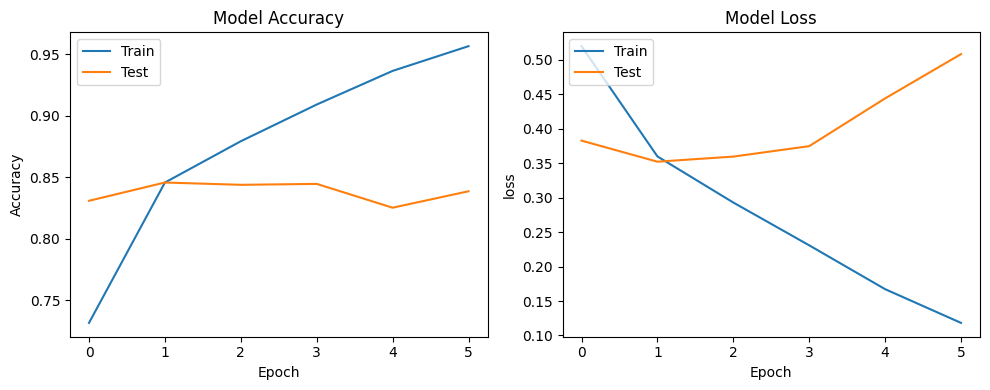

In [47]:
# Model Performance Chart

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(CNN_history.history['acc'])
plt.plot(CNN_history.history['val_acc'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()  # Adjust subplots to avoid overlapping
plt.show()

### **Long Short-Term Memory Network -[LSTM]**

In [29]:
from keras.initializers import Orthogonal

In [30]:

LSTM_Model = Sequential()

# Add an Embedding layer
LSTM_Model.add(Embedding(input_dim=vocab_length, output_dim=100, weights=[embedding_matrix], input_length=max_length, trainable=False))

# Add the LSTM layer with Orthogonal initializer
LSTM_Model.add(LSTM(128, return_sequences=True, recurrent_initializer=Orthogonal()))

# Add another LSTM layer without specifying the initializer (defaults to glorot_uniform)
LSTM_Model.add(LSTM(64))

# Add a Dropout layer
LSTM_Model.add(Dropout(0.2))

# Add the output layer with sigmoid activation for binary classification
LSTM_Model.add(Dense(1, activation='sigmoid'))

# Compile the model
LSTM_Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Print the model summary
print(LSTM_Model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     9,208,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,208,000 (35.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,208,000 (35.13 MB)

None


In [31]:
# Train the model
LSTM_history = LSTM_Model.fit(xtrain_pad, ytrain, epochs=6, batch_size=128, validation_split=0.2)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 132s 481ms/step - acc: 0.6799 - loss: 0.5858 - val_acc: 0.7746 - val_loss: 0.4772
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 110s 440ms/step - acc: 0.8054 - loss: 0.4339 - val_acc: 0.8317 - val_loss: 0.3826
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 397ms/step - acc: 0.8324 - loss: 0.3863 - val_acc: 0.8456 - val_loss: 0.3546
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 418ms/step - acc: 0.8563 - loss: 0.3437 - val_acc: 0.8608 - val_loss: 0.3234
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 108s 433ms/step - acc: 0.8687 - loss: 0.3162 - val_acc: 0.8625 - val_loss: 0.3145
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 424ms/step - acc: 0.8727 - loss: 0.3081 - val_acc: 0.8750 - val_loss: 0.3039


In [32]:
# Prediction on the Test Set

LSTM_Model.evaluate(xtest_pad, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - acc: 0.8669 - loss: 0.3149


[0.314450740814209, 0.8669999837875366]

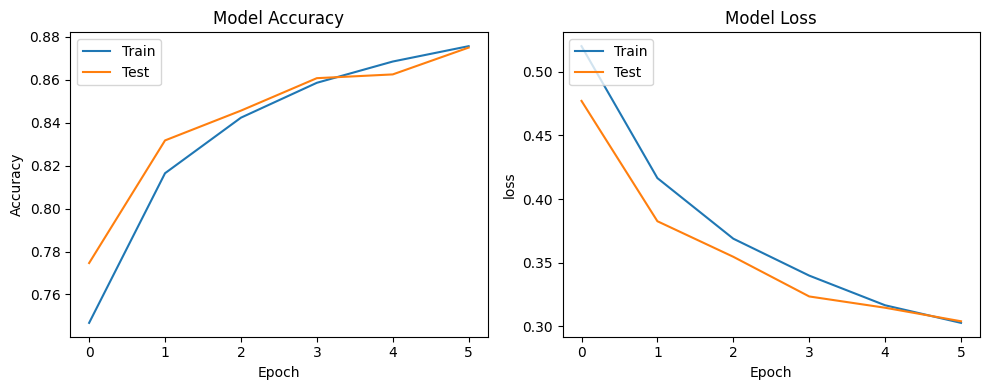

In [33]:
# Model Performance Chart

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(LSTM_history.history['acc'])
plt.plot(LSTM_history.history['val_acc'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()  # Adjust subplots to avoid overlapping
plt.show()

#### **Saving the LSTM Model**

In [34]:
# Save the model
LSTM_Model.save('LSTM_Model.h5')

In [35]:
# Save the final model in the native Keras format
LSTM_Model.save('LSTM_Model_keras.keras')

In [ ]:
# To load the model
from tensorflow.keras.models import load_model

loaded_model = load_model('LSTM_Model_keras.keras')

In [ ]:
# Convert the Tokenizer object to a dictionary
tokenizer_dict = word_tokenizer.to_json()

# Save the Tokenizer dictionary to a JSON file
with open('word_tokenizer.json', 'w') as json_file:
    json.dump(tokenizer_dict, json_file)

# Save the Tokenizer object to a file
with open('word_tokenizer.pickle', 'wb') as handle:
    pickle.dump(word_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### **Testing**

---



In [38]:
# Load the sample IMDB Reviews dataset

# sample_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDb_Unseen_data.csv', index_col=0)
sample_reviews = pd.read_csv('IMDb_Unseen_data.csv', index_col=0)

In [39]:
sample_reviews.head()

,Movie,Review Text,IMDb Rating
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10


In [40]:
# Preprocess review text

unseen_reviews = sample_reviews['Review Text']

unseen_processed = []
cus_fun = CustomPreprocess()

for review in unseen_reviews:
  review = cus_fun.preprocess_text(review)
  unseen_processed.append(review)

In [41]:
with open('website/word_tokenizer.json') as f:
    data = json.load(f)
    loaded_tokenizer = tokenizer_from_json(data)

In [42]:
# Tokenising instance
unseen_tokenized = loaded_tokenizer.texts_to_sequences(unseen_processed)

# Padding instance to have max length of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=max_length)

In [43]:
# Passing the tokenised instance to the LSTM Model for prediction

unseen_sentiments = loaded_model.predict(unseen_padded)

unseen_sentiments

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step


array([[0.93329763],
       [0.9868246 ],
       [0.14721096],
       [0.20454343],
       [0.97261715],
       [0.02183424]], dtype=float32)

In [45]:
sample_reviews['Predicted Rating'] = np.round(unseen_sentiments * 10, 1)

sample_reviews.head()

,Movie,Review Text,IMDb Rating,Predicted Rating
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,9.3
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.9
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,1.5
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,2.0
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.7
